<a href="https://colab.research.google.com/github/bhagya2000-hub/NLP_Toolkits_and_Preprocessing_Techniques_Exercises.ipynb/blob/main/NLP_Toolkits_and_Preprocessing_Techniques_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Toolkits and Preprocessing Exercises

## Introduction

We will be using [review data from Kaggle](https://www.kaggle.com/snap/amazon-fine-food-reviews) to practice preprocessing text data. The dataset contains user reviews for many products, but today we'll be focusing on the product in the dataset that had the most reviews - an oatmeal cookie.

The following code will help you load in the data. If this is your first time using nltk, you'll to need to pip install it first.

In [1]:
import nltk
# nltk.download() <-- Run this if it's your first time using nltk to download all of the datasets and models

import pandas as pd

In [25]:
data = pd.read_csv('/content/cookie_reviews.csv')
data.head()

,user_id,stars,reviews
0,A368Z46FIKHSEZ,5,I love these cookies! Not only are they healt...
1,A1JAPP1CXRG57A,5,Quaker Soft Baked Oatmeal Cookies with raisins...
2,A2Z9JNXPIEL2B9,5,I am usually not a huge fan of oatmeal cookies...
3,A31CYJQO3FL586,5,I participated in a product review that includ...
4,A2KXQ2EKFF3K2G,5,My kids loved these. I was very pleased to giv...


## Question 1 ##

* Determine how many reviews there are in total.
* Determine the percent of 1, 2, 3, 4 and 5 star reviews.
* Determine the distribution of character lengths for the reviews, by listing the values and by plotting a histogram.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  913 non-null    object
 1   stars    913 non-null    int64 
 2   reviews  913 non-null    object
dtypes: int64(1), object(2)
memory usage: 21.5+ KB


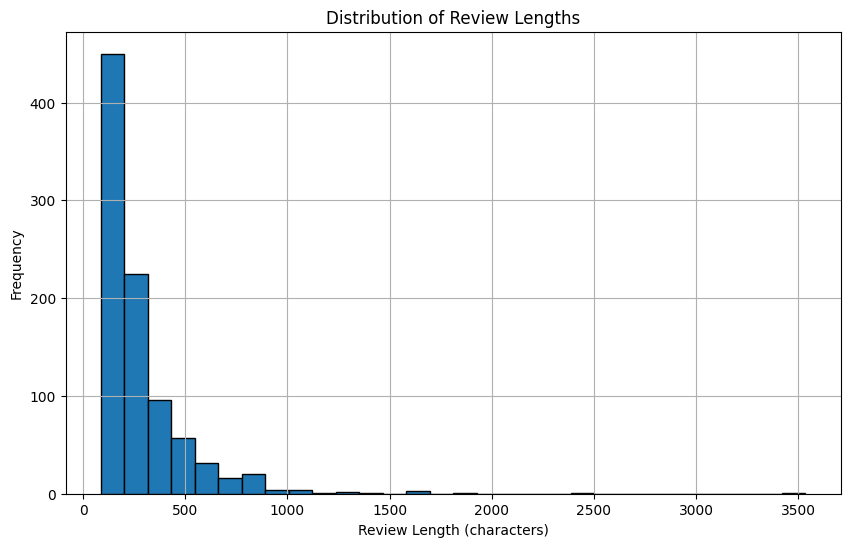

(913,
 stars
 1     0.438116
 2     1.314348
 3     6.133625
 4    23.767798
 5    68.346112
 Name: count, dtype: float64,
 count     913.000000
 mean      284.684556
 std       247.156401
 min        87.000000
 25%       146.000000
 50%       204.000000
 75%       324.000000
 max      3535.000000
 Name: review_length, dtype: float64)

In [9]:
#Question 1

import pandas as pd

# Load the CSV file
file_path = '/content/cookie_reviews.csv'
reviews_df = pd.read_csv('/content/cookie_reviews.csv')

# Display the first few rows to understand the structure of the data
reviews_df.head(), reviews_df.info()


import matplotlib.pyplot as plt

# 1. Total number of reviews
total_reviews = reviews_df.shape[0]

# 2. Percentage of each star rating
star_counts = reviews_df['stars'].value_counts().sort_index()
star_percentages = (star_counts / total_reviews) * 100

# 3. Distribution of character lengths in reviews
reviews_df['review_length'] = reviews_df['reviews'].apply(len)
length_distribution = reviews_df['review_length'].describe()

# Plotting the histogram of review lengths
plt.figure(figsize=(10, 6))
plt.hist(reviews_df['review_length'], bins=30, edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (characters)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

total_reviews, star_percentages, length_distribution


## Question 2 ##

* Apply the following preprocessing steps:

     1. Remove all words that contain numbers
     2. Make all the text lowercase
     3. Remove punctuation
     4. Tokenize the reviews into words
     
  Hint #1: Use regular expressions.
  
  Hint #2: The cookie review in the second row has numbers, upper case letters and punctuation. You can use it to test out your regular expressions.
     
     
* Find the most common words.
* Determine the word length distribution over the entire corpus.

In [23]:
#Question 2

import pandas as pd
import re
from collections import Counter

# Assuming `reviews_df` is your DataFrame and it has a column 'reviews' containing the text data.

# Step 1: Remove all words that contain numbers
reviews_df['cleaned_reviews'] = reviews_df['reviews'].apply(lambda x: re.sub(r'\w*\d\w*', '', x))

# Step 2: Make all the text lowercase
reviews_df['cleaned_reviews'] = reviews_df['cleaned_reviews'].str.lower()

# Step 3: Remove punctuation
reviews_df['cleaned_reviews'] = reviews_df['cleaned_reviews'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Step 4: Tokenize the reviews into words
reviews_df['tokens'] = reviews_df['cleaned_reviews'].apply(lambda x: x.split())

# Step 5: Find the most common words
all_words = [word for tokens in reviews_df['tokens'] for word in tokens]
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(10)

# Step 6: Determine the word length distribution
word_lengths = [len(word) for word in all_words]
word_length_distribution = Counter(word_lengths)

# Display the results
print("Most Common Words:", most_common_words)
print("Word Length Distribution:", word_length_distribution)


Most Common Words: [('i', 2003), ('and', 1748), ('the', 1645), ('a', 1303), ('to', 990), ('it', 930), ('my', 837), ('cookies', 835), ('cookie', 824), ('of', 780)]
Word Length Distribution: Counter({3: 10083, 4: 9846, 2: 7276, 5: 5880, 6: 4115, 7: 3684, 1: 3331, 8: 1290, 9: 1101, 10: 543, 11: 448, 12: 178, 13: 61, 14: 46, 15: 13, 35: 6, 17: 4, 16: 3, 18: 2, 37: 1, 22: 1})


## Question 3 ##

* Apply the following preprocessing techniques:

     * Remove stopwords
     * Perform parts of speech tagging
     * Perform stemming
     * Optional: Perform lemmatization

  Recommendation: Create a new column in your data set for every preprocessing technique you apply, so you can see the progression of the reviews text.

In [24]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag

# Ensure required resources are available
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize the stop words, stemmer, and lemmatizer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Assume `reviews_df` is your DataFrame and it already has the `tokens` column

# Step 1: Remove Stopwords
reviews_df['no_stopwords'] = reviews_df['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

# Step 2: Perform Parts of Speech Tagging
reviews_df['pos_tags'] = reviews_df['no_stopwords'].apply(lambda tokens: pos_tag(tokens))

# Step 3: Perform Stemming
reviews_df['stemmed'] = reviews_df['no_stopwords'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])

# Optional Step: Perform Lemmatization
reviews_df['lemmatized'] = reviews_df['no_stopwords'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

# Display the progression of the reviews text
print(reviews_df[['tokens', 'no_stopwords', 'pos_tags', 'stemmed', 'lemmatized']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


                                              tokens  \
0  [i, love, these, cookies, not, only, are, they...   
1  [quaker, soft, baked, oatmeal, cookies, with, ...   
2  [i, am, usually, not, a, huge, fan, of, oatmea...   
3  [i, participated, in, a, product, review, that...   
4  [my, kids, loved, these, i, was, very, pleased...   

                                        no_stopwords  \
0  [love, cookies, healthy, taste, great, soft, d...   
1  [quaker, soft, baked, oatmeal, cookies, raisin...   
2  [usually, huge, fan, oatmeal, cookies, literal...   
3  [participated, product, review, included, samp...   
4  [kids, loved, pleased, give, kids, quick, go, ...   

                                            pos_tags  \
0  [(love, VB), (cookies, NNS), (healthy, JJ), (t...   
1  [(quaker, NN), (soft, JJ), (baked, VBD), (oatm...   
2  [(usually, RB), (huge, JJ), (fan, NN), (oatmea...   
3  [(participated, JJ), (product, NN), (review, N...   
4  [(kids, NNS), (loved, VBD), (pleased, JJ), 

## Question 4 ##

* After going through these preprocessing steps, what are the most common words now? Do they make more sense?

In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag
import pandas as pd # import pandas

# Ensure required resources are available
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize the stop words, stemmer, and lemmatizer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Assuming your DataFrame is named 'df' and the text column is named 'text'
# Replace 'df' and 'text' with your actual DataFrame and column names

# Create a sample DataFrame (replace with your actual data)
df = pd.DataFrame({'text': ['This is an example sentence.', 'Another sentence for demonstration.']}) # create a sample dataframe

# Tokenize the text into words
df['tokens'] = df['text'].apply(lambda x: x.split())

# Step 1: Remove stopwords
df['no_stopwords'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words])

# Step 2: Perform parts of speech tagging
df['pos_tags'] = df['no_stopwords'].apply(lambda tokens: pos_tag(tokens))

# Step 3: Perform stemming
df['stemmed'] = df['no_stopwords'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])

# Optional Step: Perform lemmatization
df['lemmatized'] = df['no_stopwords'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

# Display the first few rows to see the progression of the text
print(df[['tokens', 'no_stopwords', 'pos_tags', 'stemmed', 'lemmatized']].head())



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


                                     tokens  \
0        [This, is, an, example, sentence.]   
1  [Another, sentence, for, demonstration.]   

                          no_stopwords  \
0                 [example, sentence.]   
1  [Another, sentence, demonstration.]   

                                            pos_tags  \
0                   [(example, NN), (sentence., NN)]   
1  [(Another, DT), (sentence, NN), (demonstration...   

                            stemmed                           lemmatized  
0               [exampl, sentence.]                 [example, sentence.]  
1  [anoth, sentenc, demonstration.]  [Another, sentence, demonstration.]  
